# Extracting WIND Direction Data From satelite Image for WIND Direction

ERA5 Daily Aggregates - Latest Climate Reanalysis Produced by ECMWF / Copernicus Climate Change Service

Wind Direction based on

*   u (from west to east) in m/s
*   v (from south to north) in m/s



## Import library

In [1]:
!pip install MetPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.5/400.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 23.9 MB/s eta 0:00:00


In [2]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00


In [3]:
import geemap
geemap.update_package()

Unzipping geemap-master.zip ...
Data downloaded to: /root/Downloads/geemap-master

Please comment out 'geemap.update_package()' and restart the kernel to take effect:
Jupyter menu -> Kernel -> Restart & Clear Output


In [4]:
import os
import ee
import numpy as np
import pandas as pd
import time
import glob
import re
import metpy
from metpy.units import units
from metpy.calc import wind_speed

In [5]:

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=2WFxSKa0x33-pwcHLtmnaXU5wkeBcexgzL-rBhdnY-w&tc=85IvSCNSk8NymAwflu_efledtwc6b3zOGvL7DVaScbs&cc=4_1edZreDtDXoaU9Xd6X2mxmoyNKL_zN7R6wyrEOW74

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfJohXl7jZ-5-BMtCQI7S4hrQD6Pbr4pHjhfHvYMoWUAxBXW2_3-ImGwnGU

Successfully saved authorization token.


In [ ]:
import palettable

In [8]:
#DATASET FOR LANDCOVER
Map = geemap.Map()
Map.add_basemap('HYBRID')
v = ee.ImageCollection('ECMWF/ERA5/DAILY').select('v_component_of_wind_10m')
u = ee.ImageCollection('ECMWF/ERA5/DAILY').select('u_component_of_wind_10m')
vis = {
  'min': 0,
  'max': 5,
  'palette':[
    '#FFFFFF', '#FFFF71', '#DEFF00', '#9EFF00', '#77B038', '#007E55', '#005F51',
    '#004B51', '#013A7B', '#023AAD'
  ]
}
Map.addLayer(u, vis , 'u')
Map.addLayer(v, vis , 'v')
states = ee.FeatureCollection("TIGER/2018/States")
#Map.add_legend(builtin_legend='NLCD')
Map.addLayer(states, {}, "US States")
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [9]:
#DATASET FOR LANDCOVER
Map = geemap.Map()
Map.add_basemap('HYBRID')
era5_2mt = ee.ImageCollection('ECMWF/ERA5/DAILY').select('mean_2m_air_temperature').filter(ee.Filter.date('2019-07-01', '2019-07-31'))
vis2mt = {
  'min': 250,
  'max': 320,
  'palette': [
    '#000080', '#0000D9', '#4000FF', '#8000FF', '#0080FF', '#00FFFF', '#00FF80',
    '#80FF00', '#DAFF00', '#FFFF00', '#FFF500', '#FFDA00', '#FFB000', '#FFA400',
    '#FF4F00', '#FF2500', '#FF0A00', '#FF00FF'
  ]
}
Map.addLayer(era5_2mt.filter(ee.Filter.date('2019-07-15')), vis2mt,'Daily mean 2m air temperature')
states = ee.FeatureCollection("TIGER/2018/States")
#Map.add_legend(builtin_legend='NLCD')
Map.addLayer(states, {}, "US States")
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [10]:
#DATASET FOR LANDCOVER
Map = geemap.Map()
Map.add_basemap('HYBRID')
era5_tp = ee.ImageCollection('ECMWF/ERA5/DAILY').select('total_precipitation').filter(ee.Filter.date('2019-07-01', '2019-07-31'))
visTp = {
  'min': 0,
  'max': 0.1,
  'palette': ['#FFFFFF', '#00FFFF', '#0080FF', '#DA00FF', '#FFA400', '#FF0000']
}
Map.addLayer(era5_tp.filter(ee.Filter.date('2019-07-15')), visTp,  'Daily total precipitation sums')
states = ee.FeatureCollection("TIGER/2018/States")
#Map.add_legend(builtin_legend='NLCD')
Map.addLayer(states, {}, "US States")
Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

## Loading DataSet

In [14]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)


In [ ]:
eachfire

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl        cp  
0        United States of America  North America          3     2919     32636  
1        United States of America  North America          3     2956     32636  
2        United States of America  North America          3     2996     32636  
3        United States of America  North America          3     3034     32636  
4        United States of America  North America          3     2884     32636  
...                           ...            ...        ...      ...       ...  
1432550  United States of America  North America          5  4027916  10248728  
1432551  United States of America  North America          4  4024780  10248728  
1432552  United States of America  North America          4  4026335  10248728  
1432553  United States of America  North America          5  4027917  10248728  
1432554  United States of America  North America          4  4024781  10248728  

[1432555 rows x 19 columns]

## Only take Interest part

In [ ]:
wind = eachfire[['lon', 'lat','dtime','cp']].copy()

In [ ]:
wind

lon        lat       dtime        cp
0       -155.084888  19.437500  2014-01-01     32636
1       -155.076051  19.437500  2014-01-01     32636
2       -155.067214  19.437500  2014-01-01     32636
3       -155.058377  19.437500  2014-01-01     32636
4       -155.085766  19.429167  2014-01-01     32636
...             ...        ...         ...       ...
1432550  -79.879981  33.029167  2019-12-31  10248728
1432551  -79.892306  33.020833  2019-12-31  10248728
1432552  -79.882368  33.020833  2019-12-31  10248728
1432553  -79.872429  33.020833  2019-12-31  10248728
1432554  -79.884756  33.012500  2019-12-31  10248728

[1432555 rows x 4 columns]

In [ ]:
##Take per day in one area of fire
new_wind = wind.drop_duplicates(
    subset=['cp','dtime'],
    keep='last').reset_index(drop=True).sort_values(['cp','dtime'])

new_wind

lon        lat       dtime        cp
217156 -154.932895  19.454167  2018-05-30        11
217182 -154.881637  19.437500  2018-05-31        11
217250 -154.871030  19.454167  2018-06-01        11
217321 -154.889588  19.445833  2018-06-02        11
217392 -154.891362  19.429167  2018-06-03        11
...            ...        ...         ...       ...
76317   -96.588897  32.287500  2015-08-23  36526726
152617  -94.693694  42.270833  2017-03-09  36526808
175666  -97.806507  48.470833  2017-08-30  36527114
76318   -94.459538  31.695833  2015-08-23  36527218
76322   -95.860392  30.045833  2015-08-23  36527322

[279960 rows x 4 columns]

In [ ]:
##Chuck divided into 120 part (To reduce error while extracting data)
list_df = np.array_split(new_wind, 120)

In [ ]:
list_df

[               lon        lat       dtime    cp
 217156 -154.932895  19.454167  2018-05-30    11
 217182 -154.881637  19.437500  2018-05-31    11
 217250 -154.871030  19.454167  2018-06-01    11
 217321 -154.889588  19.445833  2018-06-02    11
 217392 -154.891362  19.429167  2018-06-03    11
 ...            ...        ...         ...   ...
 168125 -112.725058  37.654167  2017-06-26  3315
 168251 -112.735583  37.654167  2017-06-27  3315
 228287 -110.591077  43.045833  2018-09-15  3347
 228414 -110.500442  43.020833  2018-09-16  3347
 228506 -110.523239  43.020833  2018-09-17  3347
 
 [2333 rows x 4 columns],                lon        lat       dtime     cp
 228690 -110.375061  43.020833  2018-09-18   3347
 228919 -110.496844  43.012500  2018-09-19   3347
 229146 -110.429109  42.987500  2018-09-20   3347
 229378 -110.406325  42.987500  2018-09-21   3347
 229490 -110.444083  42.995833  2018-09-22   3347
 ...            ...        ...         ...    ...
 205978  -81.555466  25.995833  201

## Extracting data from satellite Image collection ECMWF/ERA5/DAILY

In [ ]:
#Test for 1 location from satelite (Earth Engine)
lst = ee.ImageCollection('ECMWF/ERA5/DAILY')

i_date = '2017-05-01'
#Take u_component_of_wind_10m
lstu = lst.select('u_component_of_wind_10m').filterDate(i_date)
#Take v_component_of_wind_10m
lst = lst.select('v_component_of_wind_10m').filterDate(i_date)
scale = 1000  # scale in meters
# Define the location of interest as a point.
u_lon = 4.8148
u_lat = 45.7758
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Taking data
lst_urban_u = lstu.mean().sample(u_poi,scale).first().get('u_component_of_wind_10m').getInfo()
lst_urban_v = lst.mean().sample(u_poi,scale).first().get('v_component_of_wind_10m').getInfo()
print(lst_urban_u,lst_urban_v)

0.5790998339653015 1.5823732614517212


In [ ]:
#Connect to satelite image collection
lc = ee.ImageCollection('ECMWF/ERA5/DAILY')
scale = 1000  # scale in meters

#Function grab info from satelite image collection
def wind (lon,lat,date):
  lst_u = lc.select('u_component_of_wind_10m').filterDate(date)
  lst_v = lc.select('v_component_of_wind_10m').filterDate(date)

  u_poi = ee.Geometry.Point(lon, lat)
  try:
    lst_wind_u = lst_u.mean().sample(u_poi,scale).first().get('u_component_of_wind_10m').getInfo()
    lst_wind_v = lst_v.mean().sample(u_poi,scale).first().get('v_component_of_wind_10m').getInfo()
  except:
    lst_wind_u = "nan"
    lst_wind_v = "nan"
  return lst_wind_u, lst_wind_v

In [ ]:
#Manipulating time to conect with server.
n = 0
while n <= 120:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['wind'] = df.apply(lambda x: wind(x['lon'], x['lat'], x['date']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/wind_data'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 120:
    break


59already


## Prosesing Data

In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "wind_data*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/wind_data0.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data1.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data2.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data3.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data4.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data5.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data6.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data7.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data8.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data9.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data10.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data11.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data12.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data13.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data14.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data15.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data16.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data17.csv',
 '/content/gdrive/MyDrive/Thesis/wind_data18.csv',
 '/content/gdrive/MyDrive/Thesis/wind_dat

In [ ]:
# Combine into one Dataframe
Wind_complete = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
Wind_complete.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
Wind_complete

lon        lat        date        cp  \
0      -154.932895  19.454167  2018-05-30        11   
1      -154.881637  19.437500  2018-05-31        11   
2      -154.871030  19.454167  2018-06-01        11   
3      -154.889588  19.445833  2018-06-02        11   
4      -154.891362  19.429167  2018-06-03        11   
...            ...        ...         ...       ...   
279955  -96.588897  32.287500  2015-08-23  36526726   
279956  -94.693694  42.270833  2017-03-09  36526808   
279957  -97.806507  48.470833  2017-08-30  36527114   
279958  -94.459538  31.695833  2015-08-23  36527218   
279959  -95.860392  30.045833  2015-08-23  36527322   

                                              wind  
0       (-3.0528573989868164, -2.8446600437164307)  
1        (-3.352006673812866, -3.0698630809783936)  
2        (-2.279644727706909, -2.4723854064941406)  
3        (-2.494065523147583, -1.7994966506958008)  
4           (-2.771728515625, -1.6174421310424805)  
...                                            ...  
279955   (0.17998141050338745, 3.0481252670288086)  
279956   (-2.5291686058044434, -3.005234956741333)  
279957  (-1.6546839475631714, -3.4645988941192627)  
279958     (0.765441358089447, 2.0284218788146973)  
279959   (0.11172491312026978, 2.0279057025909424)  

[279960 rows x 5 columns]

In [ ]:
# Delete '(' ')' in wind column
Wind_complete['wind'] = Wind_complete['wind'].map(lambda x: x.lstrip('(').rstrip(')'))

In [ ]:
# Seperate beetween u and v
Wind_complete[['wind_u','wind_v']] = Wind_complete.wind.str.split('[,]', expand=True)
Wind_complete.drop(['wind'], inplace=True, axis=1)
Wind_complete

lon        lat        date        cp               wind_u  \
0      -154.932895  19.454167  2018-05-30        11  -3.0528573989868164   
1      -154.881637  19.437500  2018-05-31        11   -3.352006673812866   
2      -154.871030  19.454167  2018-06-01        11   -2.279644727706909   
3      -154.889588  19.445833  2018-06-02        11   -2.494065523147583   
4      -154.891362  19.429167  2018-06-03        11      -2.771728515625   
...            ...        ...         ...       ...                  ...   
279955  -96.588897  32.287500  2015-08-23  36526726  0.17998141050338745   
279956  -94.693694  42.270833  2017-03-09  36526808  -2.5291686058044434   
279957  -97.806507  48.470833  2017-08-30  36527114  -1.6546839475631714   
279958  -94.459538  31.695833  2015-08-23  36527218    0.765441358089447   
279959  -95.860392  30.045833  2015-08-23  36527322  0.11172491312026978   

                      wind_v  
0        -2.8446600437164307  
1        -3.0698630809783936  
2        -2.4723854064941406  
3        -1.7994966506958008  
4        -1.6174421310424805  
...                      ...  
279955    3.0481252670288086  
279956    -3.005234956741333  
279957   -3.4645988941192627  
279958    2.0284218788146973  
279959    2.0279057025909424  

[279960 rows x 6 columns]

## Calculate Wind Direction and speed from U and V component

In [ ]:
## calculate wind direction from u and v component
def calculate_wind_dir_degree(U, V):
    u = float(U) * (units.metre/units.seconds)
    v = float(V) * (units.metre/units.seconds)
    wind_dir = 90. * units.deg - np.arctan2(-v, -u)
    shape_original = wind_dir.shape #direction the wind is coming from
    wind_dir = np.atleast_1d(wind_dir)
    wind_dir[wind_dir < 0] += 360. * units.deg
    return wind_dir.reshape(shape_original)

## calculate wind speed from u and v component in m/s
def calculate_wind_spd(U,V):
    u = float(U)
    v = float(V)
    wind_spd = np.sqrt(np.square(u)+np.square(v))
    return wind_spd

In [ ]:
Wind_complete['wind_u'].dtypes

dtype('O')

In [ ]:
## Dataframe object to Float
Wind_complete['wind_u_flt'] = pd.to_numeric(Wind_complete['wind_u'], errors='coerce')
Wind_complete['wind_v_flt'] = pd.to_numeric(Wind_complete['wind_v'], errors='coerce')

In [ ]:
Wind_complete['wind_direction'] = Wind_complete.apply(lambda x: calculate_wind_dir_degree(x['wind_u_flt'], x['wind_v_flt']), axis=1)

In [ ]:
Wind_complete['wind_speed'] = Wind_complete.apply(lambda x: calculate_wind_spd(x['wind_u_flt'], x['wind_v_flt']), axis=1)

In [ ]:
Wind_complete

lon        lat        date        cp               wind_u  \
0      -154.932895  19.454167  2018-05-30        11  -3.0528573989868164   
1      -154.881637  19.437500  2018-05-31        11   -3.352006673812866   
2      -154.871030  19.454167  2018-06-01        11   -2.279644727706909   
3      -154.889588  19.445833  2018-06-02        11   -2.494065523147583   
4      -154.891362  19.429167  2018-06-03        11      -2.771728515625   
...            ...        ...         ...       ...                  ...   
279955  -96.588897  32.287500  2015-08-23  36526726  0.17998141050338745   
279956  -94.693694  42.270833  2017-03-09  36526808  -2.5291686058044434   
279957  -97.806507  48.470833  2017-08-30  36527114  -1.6546839475631714   
279958  -94.459538  31.695833  2015-08-23  36527218    0.765441358089447   
279959  -95.860392  30.045833  2015-08-23  36527322  0.11172491312026978   

                      wind_v  wind_u_flt  wind_v_flt  \
0        -2.8446600437164307   -3.052857   -2.844660   
1        -3.0698630809783936   -3.352007   -3.069863   
2        -2.4723854064941406   -2.279645   -2.472385   
3        -1.7994966506958008   -2.494066   -1.799497   
4        -1.6174421310424805   -2.771729   -1.617442   
...                      ...         ...         ...   
279955    3.0481252670288086    0.179981    3.048125   
279956    -3.005234956741333   -2.529169   -3.005235   
279957   -3.4645988941192627   -1.654684   -3.464599   
279958    2.0284218788146973    0.765441    2.028422   
279959    2.0279057025909424    0.111725    2.027906   

                   wind_direction  wind_speed  
0        47.02184700068143 degree    4.172772  
1       47.515661076996146 degree    4.545328  
2        42.67737631913129 degree    3.362955  
3       54.189122824377094 degree    3.075476  
4         59.7343020693647 degree    3.209143  
...                           ...         ...  
279955   183.3791969987351 degree    3.053434  
279956   40.08355088918048 degree    3.927866  
279957  25.529026682813267 degree    3.839456  
279958  200.67440348868902 degree    2.168040  
279959  183.15345088172876 degree    2.030981  

[279960 rows x 10 columns]

## save dataset to csv

In [ ]:
Wind_complete.to_csv('/content/gdrive/MyDrive/Thesis/Wind_complete.csv')

In [ ]:
Wind_complete='/content/gdrive/MyDrive/Thesis/Wind_complete.csv'
Wind_complete = pd.read_csv(Wind_complete, index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Wind_complete

cp        date  wind_u_flt  wind_v_flt  \
0             11  2018-05-30   -3.052857   -2.844660   
1             11  2018-05-31   -3.352007   -3.069863   
2             11  2018-06-01   -2.279645   -2.472385   
3             11  2018-06-02   -2.494066   -1.799497   
4             11  2018-06-03   -2.771729   -1.617442   
...          ...         ...         ...         ...   
279955  36526726  2015-08-23    0.179981    3.048125   
279956  36526808  2017-03-09   -2.529169   -3.005235   
279957  36527114  2017-08-30   -1.654684   -3.464599   
279958  36527218  2015-08-23    0.765441    2.028422   
279959  36527322  2015-08-23    0.111725    2.027906   

                   wind_direction  wind_speed  
0        47.02184700068143 degree    4.172772  
1       47.515661076996146 degree    4.545328  
2        42.67737631913129 degree    3.362955  
3       54.189122824377094 degree    3.075476  
4         59.7343020693647 degree    3.209143  
...                           ...         ...  
279955   183.3791969987351 degree    3.053434  
279956   40.08355088918048 degree    3.927866  
279957  25.529026682813267 degree    3.839456  
279958  200.67440348868902 degree    2.168040  
279959  183.15345088172876 degree    2.030981  

[279960 rows x 6 columns]

In [ ]:
Wind_complete.head(50)

cp        date  wind_u_flt  wind_v_flt             wind_direction  \
0   11  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
1   11  2018-05-31   -3.352007   -3.069863  47.515661076996146 degree   
2   11  2018-06-01   -2.279645   -2.472385   42.67737631913129 degree   
3   11  2018-06-02   -2.494066   -1.799497  54.189122824377094 degree   
4   11  2018-06-03   -2.771729   -1.617442    59.7343020693647 degree   
5   11  2018-06-04   -2.763785   -3.208791    40.7388723939085 degree   
6   11  2018-06-05   -2.934667   -4.510471   33.04940848230926 degree   
7   11  2018-06-06   -2.647545   -4.054485  33.144204719176685 degree   
8   11  2018-06-07   -1.359467   -2.477673   28.75299852435706 degree   
9   11  2018-06-08   -0.650371   -1.377826   25.26859002490812 degree   
10  11  2018-06-09   -2.336447   -1.662915  54.559461755364886 degree   
11  11  2018-06-10   -2.840221   -3.221985  41.396589257667635 degree   
12  11  2018-06-11   -2.677931   -3.745624   35.56284509808301 degree   
13  11  2018-06-12   -2.228802   -2.514656    41.5513714849002 degree   
14  11  2018-06-13   -1.709231   -1.949326   41.24530981002924 degree   
15  11  2018-06-14   -2.305915   -1.002029   66.51277736649159 degree   
16  11  2018-06-15   -1.595420   -1.769542   42.03784749347463 degree   
17  11  2018-06-16   -2.798657   -1.203668   66.72805690022474 degree   
18  11  2018-06-17   -2.784002   -1.660891   59.18037006629038 degree   
19  11  2018-06-18   -2.337098   -2.495488   43.12277584299031 degree   
20  11  2018-06-19   -2.341449   -2.013089   49.31230802874897 degree   
21  11  2018-06-20   -2.267582   -0.257337   83.52548632138001 degree   
22  11  2018-06-21   -1.934636   -1.415794   53.80280468527524 degree   
23  11  2018-06-22   -1.645210   -2.712018  31.242544420627965 degree   
24  11  2018-06-23   -2.485821   -3.695833   33.92481355250797 degree   
25  11  2018-06-24   -1.682001   -3.095412   28.51900417666802 degree   
26  11  2018-06-25   -1.868851   -3.507070   28.05230974317344 degree   
27  11  2018-06-26   -2.411421   -3.625642    33.6279519333957 degree   
28  11  2018-06-27   -2.662417   -3.421659  37.886737269865264 degree   
29  11  2018-06-28   -2.182248   -2.731180   38.62530411694761 degree   
30  11  2018-06-29   -3.222138   -2.581340   51.30085287147822 degree   
31  11  2018-06-30   -2.392155   -2.320621  45.869604162902206 degree   
32  11  2018-07-01   -1.699071   -1.835842   42.78423819329423 degree   
33  11  2018-07-02   -1.893613   -1.484542  51.904493022849685 degree   
34  11  2018-07-03   -2.155958   -2.874706   36.86898526603185 degree   
35  11  2018-07-04   -2.180218   -2.862520   37.29444532787001 degree   
36  11  2018-07-05   -1.485531   -2.323850   32.58892942342111 degree   
37  11  2018-07-06   -1.293782   -4.507862   16.01378218257041 degree   
38  11  2018-07-07   -1.036990   -3.102482   18.48196117380151 degree   
39  11  2018-07-08   -1.595179   -2.979202   28.16630503599361 degree   
40  11  2018-07-09   -1.741439   -1.361567   51.97945734600211 degree   
41  11  2018-07-10   -2.536620   -1.760973   55.23083958373289 degree   
42  11  2018-07-11   -2.402548   -3.621162    33.5632466225279 degree   
43  11  2018-07-12   -2.821694   -3.713607   37.22850245795424 degree   
44  11  2018-07-13   -1.519726   -3.270846   24.92088752042585 degree   
45  11  2018-07-14   -1.321209   -1.893073  34.911866988864865 degree   
46  11  2018-07-15   -1.358901   -1.487715  42.409033725861406 degree   
47  11  2018-07-16   -1.938031   -2.339764   39.63500928906161 degree   
48  11  2018-07-17   -2.271924   -3.436493   33.46936632198925 degree   
49  11  2018-07-18   -2.310964   -2.762983  39.909164231468644 degree   

    wind_speed  
0     4.172772  
1     4.545328  
2     3.362955  
3     3.075476  
4     3.209143  
5     4.234955  
6     5.381136  
7     4.842349  
8     2.826130  
9     1.523610  
10    2.867799  
11    4.295118  
12    4.604456  
13    3.360216  
14    2.592555  
15    2.

In [ ]:
Wind_complete = Wind_complete[['cp', 'date','wind_u_flt','wind_v_flt','wind_direction','wind_speed']].copy()

## Put in the data

In [ ]:
wind_full = eachfire[['lon', 'lat','dtime','cp','conf','maxFRP']].copy()

In [ ]:
wind_full.sort_values(['cp','dtime'])

lon        lat       dtime        cp  conf  maxFRP
1093740 -154.883479  19.504167  2018-05-30        11     8     328
1093741 -154.874638  19.504167  2018-05-30        11     8     328
1093742 -154.884342  19.495833  2018-05-30        11     8     328
1093743 -154.875502  19.495833  2018-05-30        11     8     328
1093744 -154.911728  19.487500  2018-05-30        11     7    1367
...             ...        ...         ...       ...   ...     ...
396931   -96.588897  32.287500  2015-08-23  36526726     8      75
752766   -94.693694  42.270833  2017-03-09  36526808     7      53
884274   -97.806507  48.470833  2017-08-30  36527114     9     205
396932   -94.459538  31.695833  2015-08-23  36527218     7      56
396965   -95.860392  30.045833  2015-08-23  36527322     8      81

[1432555 rows x 6 columns]

In [ ]:
new_df = pd.merge(wind_full, Wind_complete,  how='left', left_on=['cp','dtime'], right_on = ['cp','date'])

In [ ]:
new_df.sort_values(['cp','dtime'])

lon        lat       dtime        cp  conf  maxFRP  \
1093740 -154.883479  19.504167  2018-05-30        11     8     328   
1093741 -154.874638  19.504167  2018-05-30        11     8     328   
1093742 -154.884342  19.495833  2018-05-30        11     8     328   
1093743 -154.875502  19.495833  2018-05-30        11     8     328   
1093744 -154.911728  19.487500  2018-05-30        11     7    1367   
...             ...        ...         ...       ...   ...     ...   
396931   -96.588897  32.287500  2015-08-23  36526726     8      75   
752766   -94.693694  42.270833  2017-03-09  36526808     7      53   
884274   -97.806507  48.470833  2017-08-30  36527114     9     205   
396932   -94.459538  31.695833  2015-08-23  36527218     7      56   
396965   -95.860392  30.045833  2015-08-23  36527322     8      81   

               date  wind_u_flt  wind_v_flt             wind_direction  \
1093740  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
1093741  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
1093742  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
1093743  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
1093744  2018-05-30   -3.052857   -2.844660   47.02184700068143 degree   
...             ...         ...         ...                        ...   
396931   2015-08-23    0.179981    3.048125   183.3791969987351 degree   
752766   2017-03-09   -2.529169   -3.005235   40.08355088918048 degree   
884274   2017-08-30   -1.654684   -3.464599  25.529026682813267 degree   
396932   2015-08-23    0.765441    2.028422  200.67440348868902 degree   
396965   2015-08-23    0.111725    2.027906  183.15345088172876 degree   

         wind_speed  
1093740    4.172772  
1093741    4.172772  
1093742    4.172772  
1093743    4.172772  
1093744    4.172772  
...             ...  
396931     3.053434  
752766     3.927866  
884274     3.839456  
396932     2.168040  
396965     2.030981  

[1432555 rows x 11 columns]

In [ ]:
new_df.to_csv('/content/gdrive/MyDrive/Thesis/Wind_complete_full.csv')

## Wind Data Analysis

In [20]:
wind_analysis='/content/gdrive/MyDrive/Thesis/Wind+Elevation+landcover+temp.csv'
wind_analysis = pd.read_csv(wind_analysis)
wind_analysis.drop(['Unnamed: 0'], inplace=True, axis=1)


In [21]:
wind_analysis

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover       temp  
0        47.02184700068143 degree    4.172772         2  23.080377  
1       47.515661076996146 degree    4.545328         2  22.545190  
2        42.67737631913129 degree    3.362955         2  22.030054  
3       54.189122824377094 degree    3.075476         8  30.750000  
4         59.7343020693647 degree    3.209143         8  25.630000  
...                           ...         ...       ...        ...  
279955   183.3791969987351 degree    3.053434        10  29.722222  
279956   40.08355088918048 degree    3.927866        12   3.055556  
279957  25.529026682813267 degree    3.839456        12  32.510000  
279958  200.67440348868902 degree    2.168040         8  26.110000  
279959  183.15345088172876 degree    2.030981        10  29.166667  

[279960 rows x 9 columns]

In [22]:
wind_analysis.wind_speed.describe()

count    279959.000000
mean          2.336793
std           1.294639
min           0.006398
25%           1.400014
50%           2.163614
75%           3.056815
max          12.506315
Name: wind_speed, dtype: float64

In [23]:
wind_analysis[new_df['wind_speed'] > 3 ].groupby('wind_speed')['wind_speed'].count().sum()

73500

In [24]:
v = wind_analysis.cp.value_counts()

In [25]:
v

529         107
845          75
11           71
2482         67
1667         59
           ... 
14325220      1
14325318      1
14325510      1
14325712      1
36527322      1
Name: cp, Length: 247395, dtype: int64

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


In [28]:
more3 = wind_analysis[wind_analysis.cp.isin(v.index[v.gt(10)])]

In [29]:
more3

lon        lat        date      cp  elevation  \
0     -154.932895  19.454167  2018-05-30      11      309.0   
1     -154.881637  19.437500  2018-05-31      11       52.0   
2     -154.871030  19.454167  2018-06-01      11       66.0   
3     -154.889588  19.445833  2018-06-02      11       94.0   
4     -154.891362  19.429167  2018-06-03      11       56.0   
...           ...        ...         ...     ...        ...   
18179 -101.936674  32.204167  2019-05-20  708835      845.0   
18180 -101.926315  32.212500  2019-05-21  708835      849.0   
18181 -101.936674  32.204167  2019-05-22  708835      845.0   
18182 -101.926315  32.212500  2019-05-23  708835      849.0   
18183 -101.936165  32.212500  2019-05-24  708835      849.0   

                  wind_direction  wind_speed landcover       temp  
0       47.02184700068143 degree    4.172772         2  23.080377  
1      47.515661076996146 degree    4.545328         2  22.545190  
2       42.67737631913129 degree    3.362955         2  22.030054  
3      54.189122824377094 degree    3.075476         8  30.750000  
4        59.7343020693647 degree    3.209143         8  25.630000  
...                          ...         ...       ...        ...  
18179  163.91878948370015 degree    7.337616        10  24.749445  
18180  243.38826076902464 degree    6.243352        12  26.010000  
18181   199.3422906163276 degree    4.373414        10  33.390000  
18182  164.08298791352553 degree    8.220663        12  31.210000  
18183  152.90180466320334 degree    4.407733        10  24.502802  

[5123 rows x 9 columns]

In [30]:
from datetime import datetime, date

wind_analysis['date'] = pd.to_datetime(wind_analysis['date'], format = '%Y/%m/%d')
wind_analysis.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})


In [125]:
windsanalysis = wind_analysis[['date','wind_speed','wind_direction']].copy()

In [129]:
windsanalysis

date  wind_speed             wind_direction
0      2018-05-30    4.172772   47.02184700068143 degree
1      2018-05-31    4.545328  47.515661076996146 degree
2      2018-06-01    3.362955   42.67737631913129 degree
3      2018-06-02    3.075476  54.189122824377094 degree
4      2018-06-03    3.209143    59.7343020693647 degree
...           ...         ...                        ...
279955 2015-08-23    3.053434   183.3791969987351 degree
279956 2017-03-09    3.927866   40.08355088918048 degree
279957 2017-08-30    3.839456  25.529026682813267 degree
279958 2015-08-23    2.168040  200.67440348868902 degree
279959 2015-08-23    2.030981  183.15345088172876 degree

[279959 rows x 3 columns]

In [130]:
windsanalysis = windsanalysis[['date', 'wind_speed', 'wind_direction']].dropna() # Remove rows with null data.
windsanalysis["wind_speed"] = pd.to_numeric(windsanalysis[ "wind_speed"], errors='coerce')    # Convert to numeric values.
windsanalysis['wind_direction'] = windsanalysis['wind_direction'].str.replace(' degree', '')
windsanalysis['wind_direction'] = pd.to_numeric(windsanalysis[ "wind_direction"], errors='coerce')

In [131]:
windsanalysis

date  wind_speed  wind_direction
0      2018-05-30    4.172772       47.021847
1      2018-05-31    4.545328       47.515661
2      2018-06-01    3.362955       42.677376
3      2018-06-02    3.075476       54.189123
4      2018-06-03    3.209143       59.734302
...           ...         ...             ...
279955 2015-08-23    3.053434      183.379197
279956 2017-03-09    3.927866       40.083551
279957 2017-08-30    3.839456       25.529027
279958 2015-08-23    2.168040      200.674403
279959 2015-08-23    2.030981      183.153451

[279959 rows x 3 columns]

In [118]:
windsanalysis.date.max()

Timestamp('2019-12-31 00:00:00')

Text(0.5, 0, 'year')

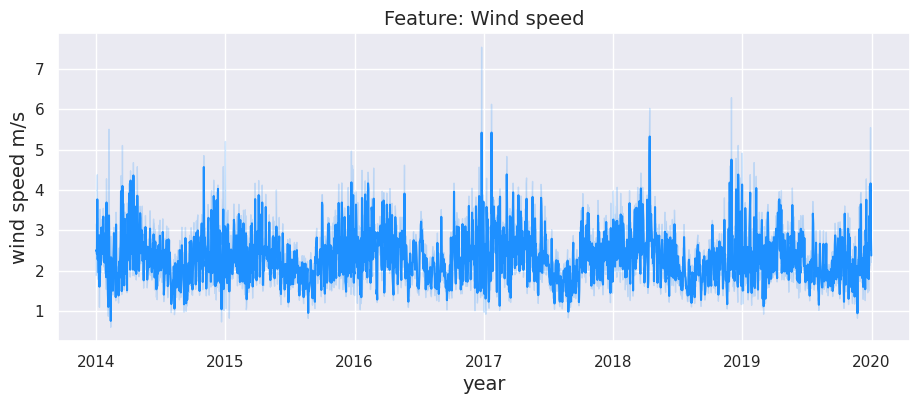

In [133]:
# Wind Speed
f, ax = plt.subplots(nrows=1, ncols=1)
sns.lineplot(x=windsanalysis['date'], y=windsanalysis["wind_speed"].fillna(method='ffill'),  color='dodgerblue')
ax.set_title('Feature: Wind speed', fontsize=14)
ax.set_ylabel(ylabel="wind speed m/s", fontsize=14)
ax.set_xlabel(xlabel="year", fontsize=14)

Text(0.5, 0, 'year')

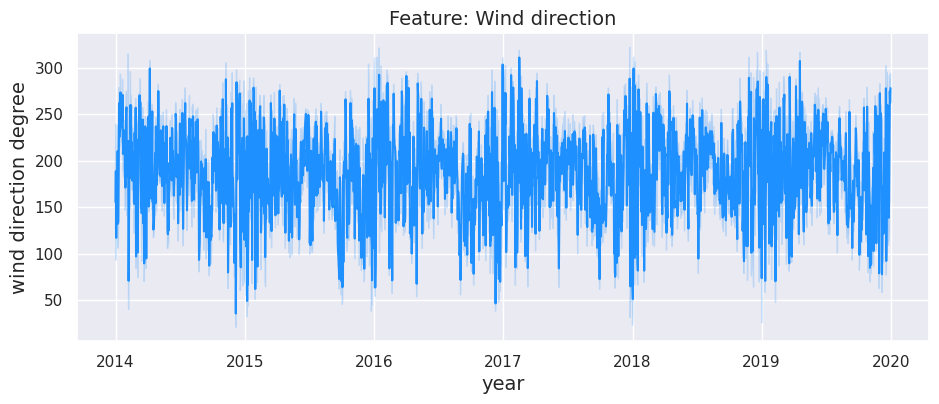

In [134]:
# Wind direction
f, ax = plt.subplots(nrows=1, ncols=1)
sns.lineplot(x=windsanalysis['date'], y=windsanalysis["wind_direction"].fillna(method='ffill'),  color='dodgerblue')
ax.set_title('Feature: Wind direction', fontsize=14)
ax.set_ylabel(ylabel="wind direction degree", fontsize=14)
ax.set_xlabel(xlabel="year", fontsize=14)

In [137]:
tempanalysis = wind_analysis[['date','temp']].copy()
tempanalysis = tempanalysis[['date', 'temp']].dropna() # Remove rows with null data.

In [ ]:
new_df.wind_direction.describe()

count                       279960
unique                      243297
top       34.89928607529933 degree
freq                            13
Name: wind_direction, dtype: object

# other aproach wind calculation
wind data done in previous line
its just another code for calculation

In [ ]:
wind_abs = math.sqrt((lst_urban_u*lst_urban_u) + (lst_urban_v*lst_urban_v))
wind_dir_trig_to = math.atan2(lst_urban_u/wind_abs, lst_urban_v/wind_abs)
wind_dir_trig_to_degrees = wind_dir_trig_to * (180/math.pi) ## -111.6 degrees

In [ ]:
#convert this wind vector to the meteorological convention of the direction the wind is coming from:
wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 ## 68.38 degrees

In [ ]:
#convert that angle from "trig" coordinates to cardinal coordinates:
wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
wind_dir_cardinal